#### Why is Linear Regression Important?

Linear Regression is one of the most fundamental algorithms in Machine Learning and Data Science due to the following reasons:

##### 1. Simplicity and Interpretability
- It is easy to understand and implement.
- The coefficients (β values) clearly show how each independent variable affects the dependent variable.
- Helps in explaining **why** a prediction was made, which is important for business and research decisions.

##### 2. Foundation for Other Models
- Many advanced algorithms (e.g., Ridge, Lasso, Elastic Net) are extensions of linear regression.
- Understanding linear regression makes it easier to learn more complex ML models.

##### 3. Baseline Model
- Often used as a starting point to compare with complex models.
- If a complex model does not outperform linear regression, added complexity may not be necessary.

##### 4. Feature Importance
- The magnitude of coefficients (after scaling) indicates the importance of features.
- Helps in identifying key factors influencing the target variable.

##### 5. Wide Applicability
- Used in various real-world domains such as:
  - Economic forecasting
  - Scientific research
  - Social science studies
  - Business analytics and trend analysis


## Implementing Linear Regression with Scikit-learn

### Predicting House Prices

In [3]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# 2. Building sample dataset
np.random.seed(42)
num_samples = 100

# Independent variable: Square Footage
# Let's assume square footage ranges from 500 to 3000 sq ft
square_footage = 500 + 2500 * np.random.rand(num_samples, 1)

# Dependent variable: House Price
# Let's assume a base price and a price per sq ft, with some noise
# Base price: $50,000
# Price per sq ft: $150
# Noise: random variation
house_price = 50000 + 150 * square_footage + np.random.randn(num_samples, 1) * 50000

data = pd.DataFrame({
    'SquareFootage':square_footage.flatten(),
    'Price':house_price.flatten()
})
print(data.head())

   SquareFootage          Price
0    1436.350297  269804.897980
1    2876.785766  466567.497380
2    2329.984855  404085.767006
3    1996.646210  250118.485844
4     890.046601  172523.395774


In [7]:
# 3. Prepare Data for Scikit-learn
X = data[['SquareFootage']]
y = data['Price']

In [8]:
# 4. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
# 5. Instantiate and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

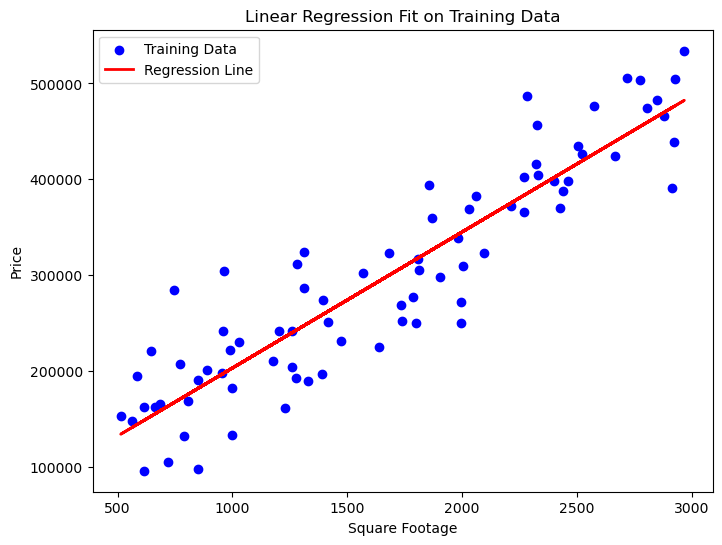

In [10]:
# 6. Visualize the Training Data and the Fitted Line
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression Fit on Training Data')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()

In [11]:
# Interpreting Coefficients in Our House Price 
intercept = model.intercept_
coefficients = model.coef_
print(f"Intercept (β₀): {intercept:.2f}")
print(f"Coefficient for SquareFootage (β₁): {coefficients[0]:.2f}")

Intercept (β₀): 61159.19
Coefficient for SquareFootage (β₁): 141.97


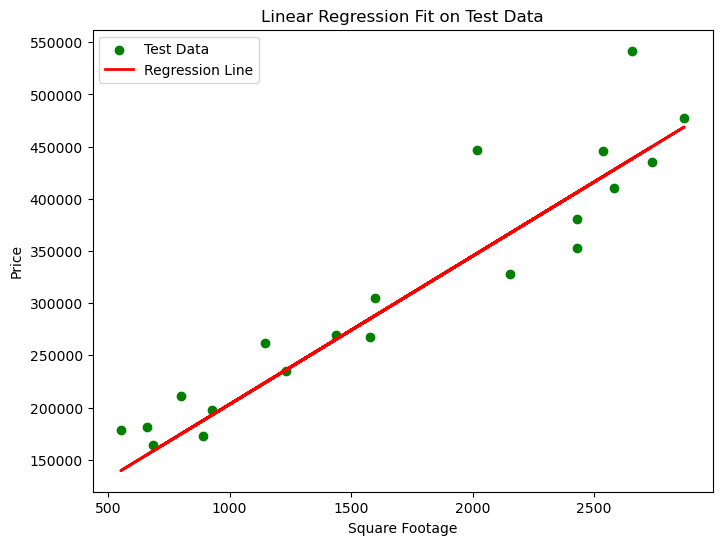

In [12]:
# Visualizing the Relationship with Predictions
y_pred = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='green',label='Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression Fit on Test Data')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()

In [17]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 1634248784.29
R-squared (R²): 0.87


In [21]:
# Making Predictions on New Data
# Defining new dataset
new_houses_data = pd.DataFrame({
    'SquareFootage': [1200, 2500, 800]
})

predicted_prices = model.predict(new_houses_data)
new_houses_data['PredictedPrice'] = predicted_prices
print("Predictions for new houses:")
print(new_houses_data)

Predictions for new houses:
   SquareFootage  PredictedPrice
0           1200   231526.728382
1           2500   416091.558571
2            800   174737.549863
